In [43]:
!pip install matplotlib
!pip install seaborn
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:

# Importing Data
URL = 'events.csv'
df = pd.read_csv(URL)

In [45]:
print("Return first 5 rows.","\n")
df.head()
print("Return last 5 rows.","\n")
df.tail()

Return first 5 rows. 

Return last 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in India
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


In [46]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Start time UTC                    52966 non-null  object 
 1   End time UTC                      52966 non-null  object 
 2   Start time UTC+03:00              52966 non-null  object 
 3   End time UTC+03:00                52966 non-null  object 
 4   Electricity consumption in India  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [47]:
#print("Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.", "\n")
print(df.describe(), "\n")

       Electricity consumption in India
count                      52966.000000
mean                        9488.750519
std                         1576.241673
min                         5341.000000
25%                         8322.000000
50%                         9277.000000
75%                        10602.000000
max                        15105.000000 



In [48]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in India":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [49]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [50]:
dataset.head()


print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [51]:
dataset = dataset[71:-121]
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday
2021-12-26 22:00:00,12384.0,12,2021,2021-12-26,22:00:00,51,Sunday
2021-12-26 23:00:00,12044.0,12,2021,2021-12-26,23:00:00,51,Sunday


C:\Users\Ankith Hebbar\AppData\Local\Temp\ipykernel_23176\1488311518.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


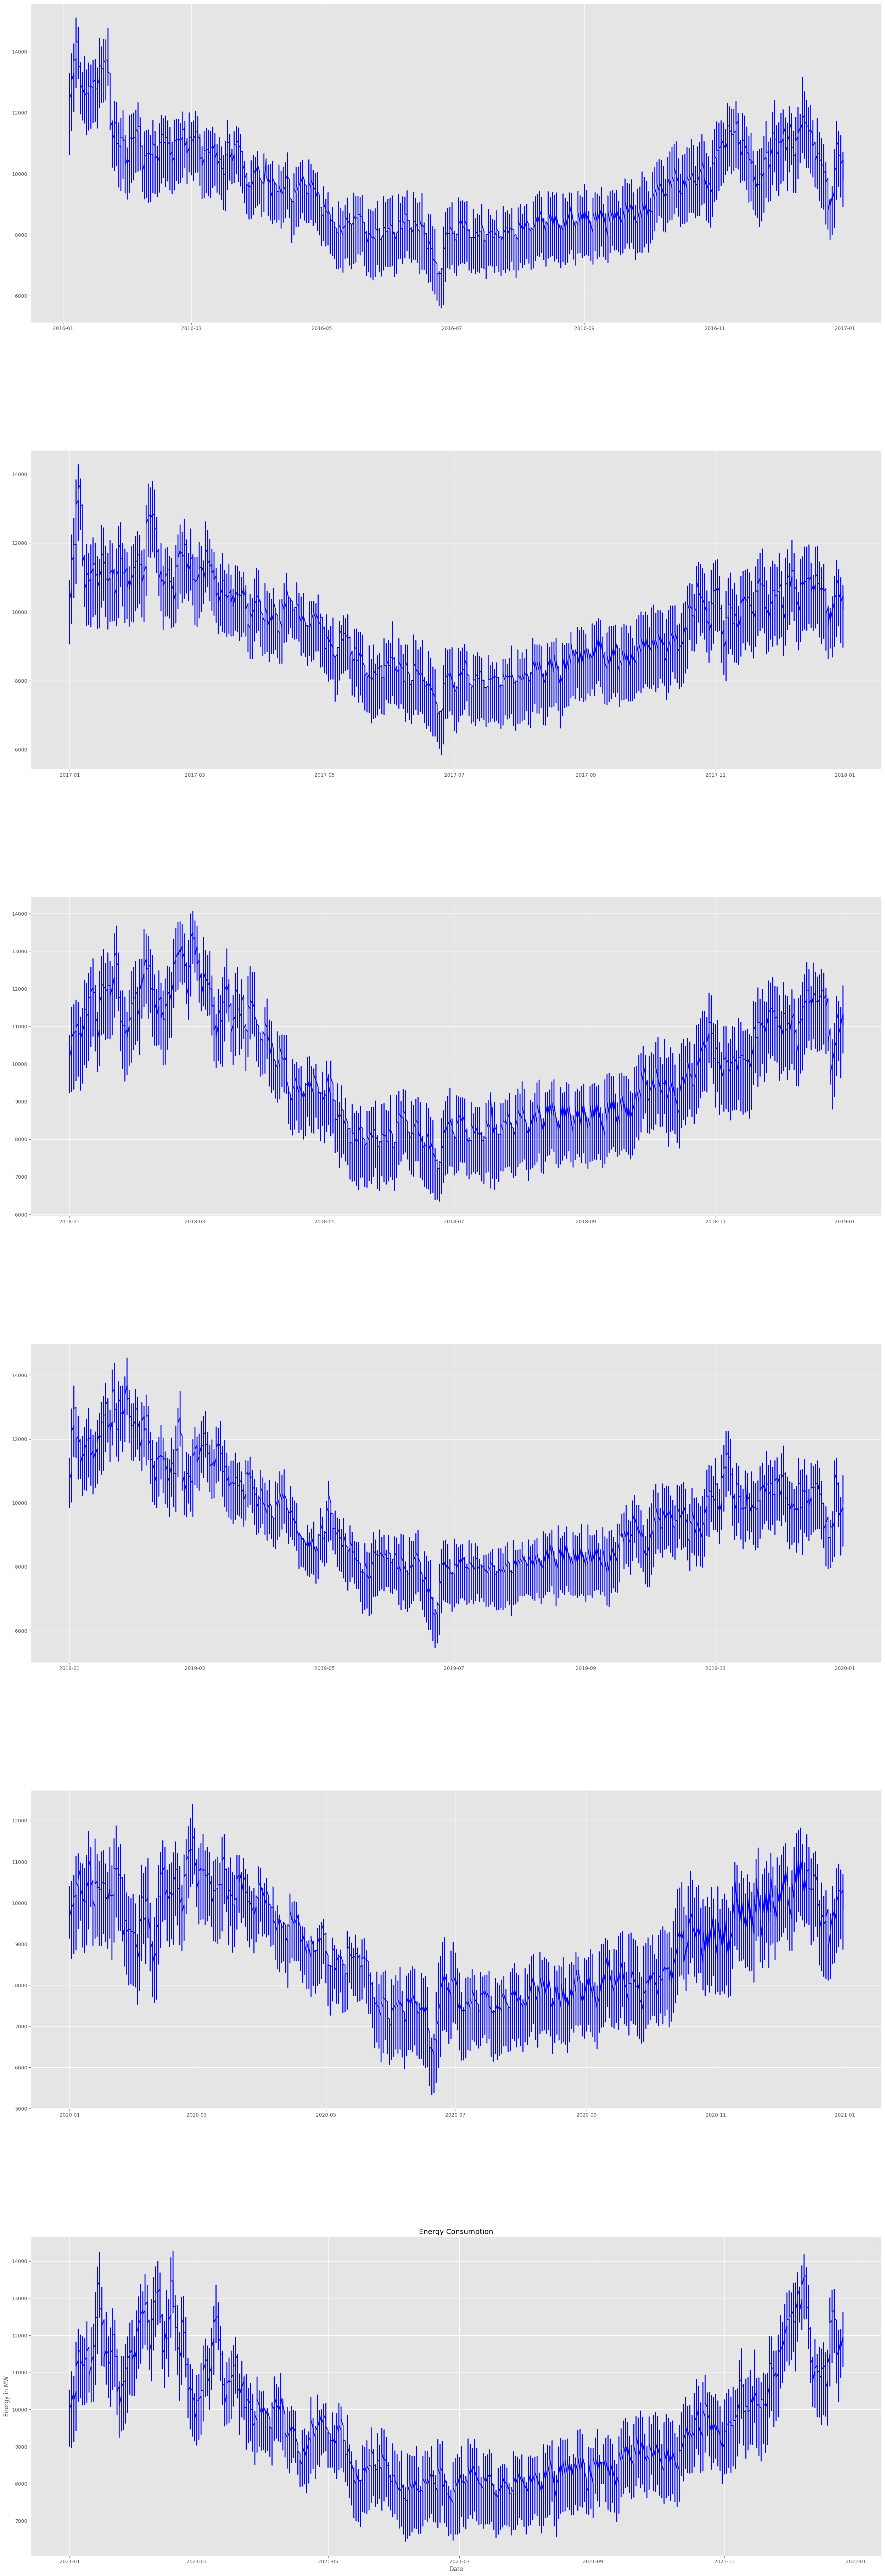

In [52]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Consumption"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2017"]["Consumption"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2018"]["Consumption"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2019"]["Consumption"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Consumption"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Consumption"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

C:\Users\Ankith Hebbar\AppData\Local\Temp\ipykernel_23176\1952416682.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

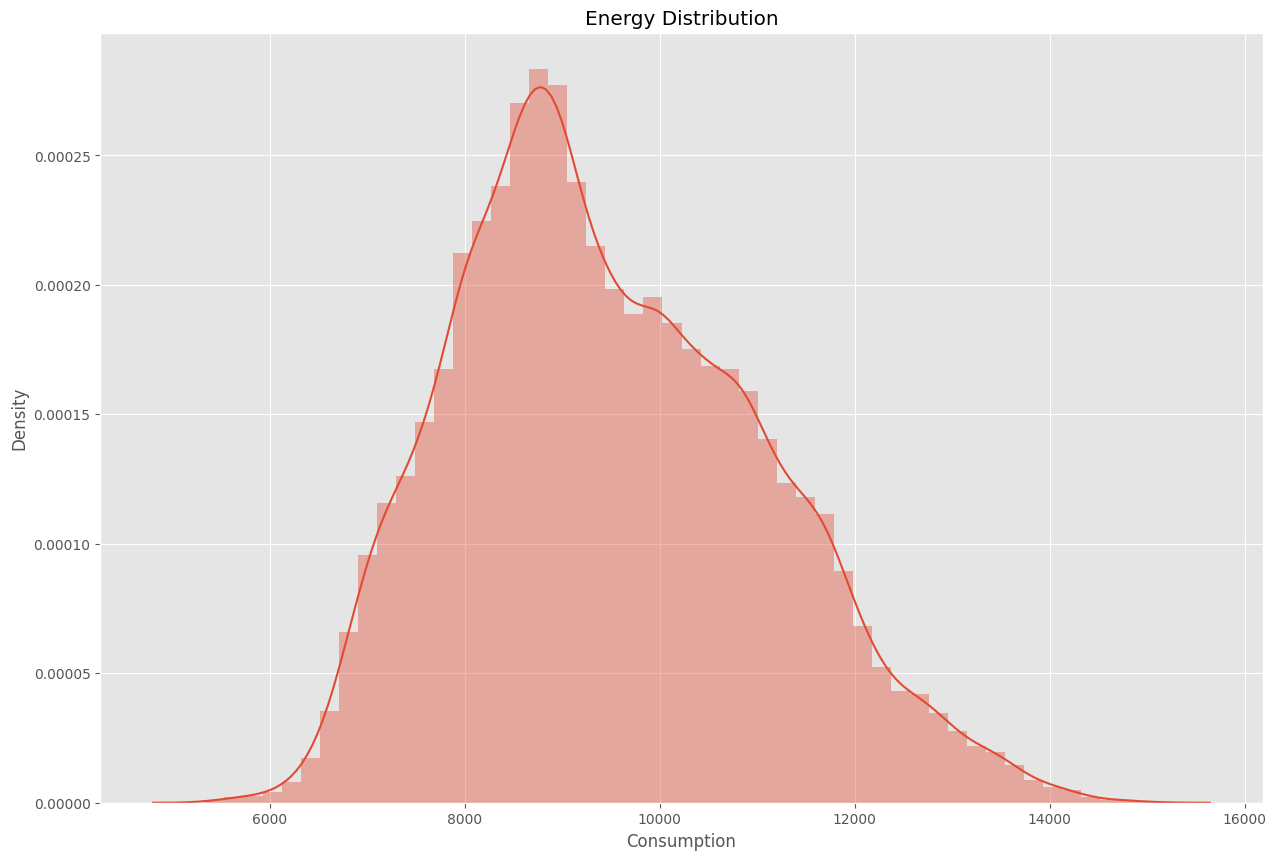

In [53]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

**MODEL TRAINING**

In [54]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days 
newDataSet = dataset.resample("D").mean(numeric_only=True)

In [55]:
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [56]:
y = newDataSet["Consumption"]
print(y[0])
y.shape



12300.625


C:\Users\Ankith Hebbar\AppData\Local\Temp\ipykernel_23176\3217129279.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[0])


(2184,)

In [57]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1)) 
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])


Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [58]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]

In [59]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)


X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


In [114]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1), dropout=0.2, recurrent_dropout=0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

# Third LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

# Fourth LSTM layer (no return_sequences) with Dropout
model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary
model.summary()


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_100 (LSTM)                 │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_101 (LSTM)                 │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_102 (LSTM)                 │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_103 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_92 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_93 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_94 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_95 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 60 ,batch_size = 10)

Epoch 1/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - loss: 0.0456 - val_loss: 0.0204
Epoch 2/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - loss: 0.0254 - val_loss: 0.0154
Epoch 3/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - loss: 0.0207 - val_loss: 0.0115
Epoch 4/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - loss: 0.0153 - val_loss: 0.0141
Epoch 5/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - loss: 0.0156 - val_loss: 0.0069
Epoch 6/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - loss: 0.0127 - val_loss: 0.0091
Epoch 7/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - loss: 0.0140 - val_loss: 0.0068
Epoch 8/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - loss: 0.0128 - val_loss: 0.0142
Epoch 9/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - loss: 0.0118 - val_loss: 0.0070
Epoch 10/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 11/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - loss: 0.0110 - val_loss: 0.0055
Epoch 12/60
130/130

In [116]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [117]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(1297, 1)
(336, 1)
(248, 1)
[8693.727]
(1297, 1)


In [118]:

# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


,Train Predictions,Actuals
0,[8693.7265625],[9406.708333333334]
1,[8778.61328125],[9614.791666666666]
2,[8821.9599609375],[9894.708333333334]
3,[8969.9912109375],[8933.708333333334]
4,[8488.9453125],[8557.208333333334]
...,...,...
1292,[8589.271484375],[9259.666666666666]
1293,[8692.921875],[10248.5]
1294,[9112.6259765625],[10360.333333333334]
1295,[9197.423828125],[10489.833333333334]


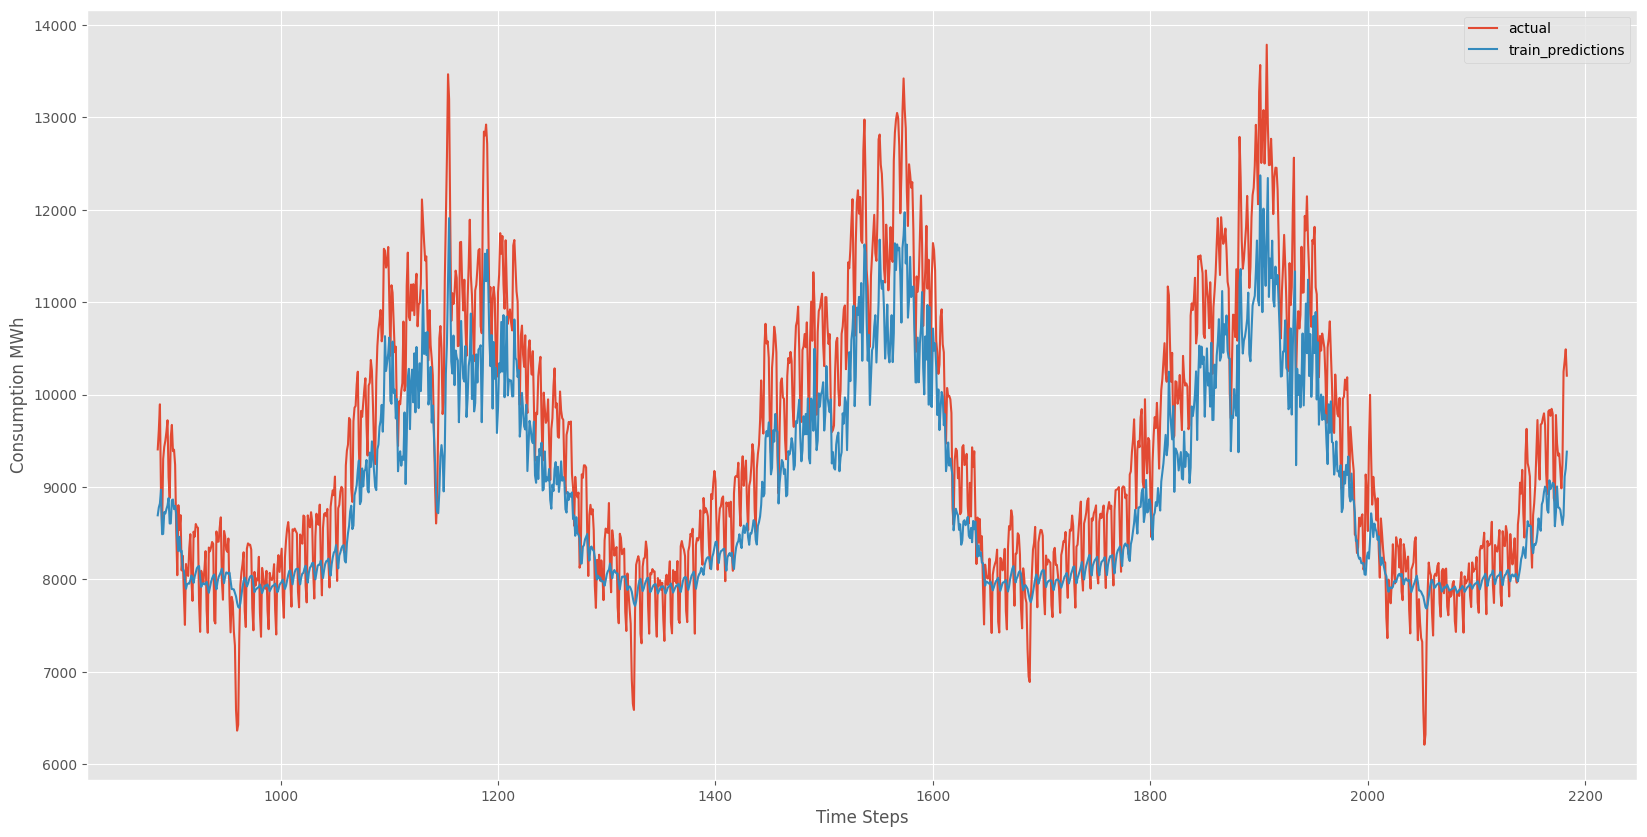

In [119]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

# Calculating error metrics
mae = mean_absolute_error(actual_val, val_predictions)
mse = mean_squared_error(actual_val, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_val, val_predictions)

# Calculating accuracy as a percentage
mape = np.mean(np.abs((actual_val - val_predictions) / actual_val)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Accuracy in percentage

# Display results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Model Accuracy: {accuracy:.2f}%")

# Display the DataFrame
print(val_results.head())

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Mean Absolute Error (MAE): 464.9966
Mean Squared Error (MSE): 331640.8350
Root Mean Squared Error (RMSE): 575.8827
R-squared (R²) Score: 0.7396
Model Accuracy: 94.58%
     Val Predictions           Actuals_val
0    [8591.41796875]            [8931.875]
1    [8750.13671875]   [9112.916666666666]
2  [8680.6591796875]  [10019.416666666666]
3      [9032.921875]           [10390.375]
4    [9191.00390625]  [10802.916666666666]


Training RMSE: 736.1145, MAE: 608.5439, R²: 0.7414
Validation RMSE: 575.8827, MAE: 464.9966, R²: 0.7396


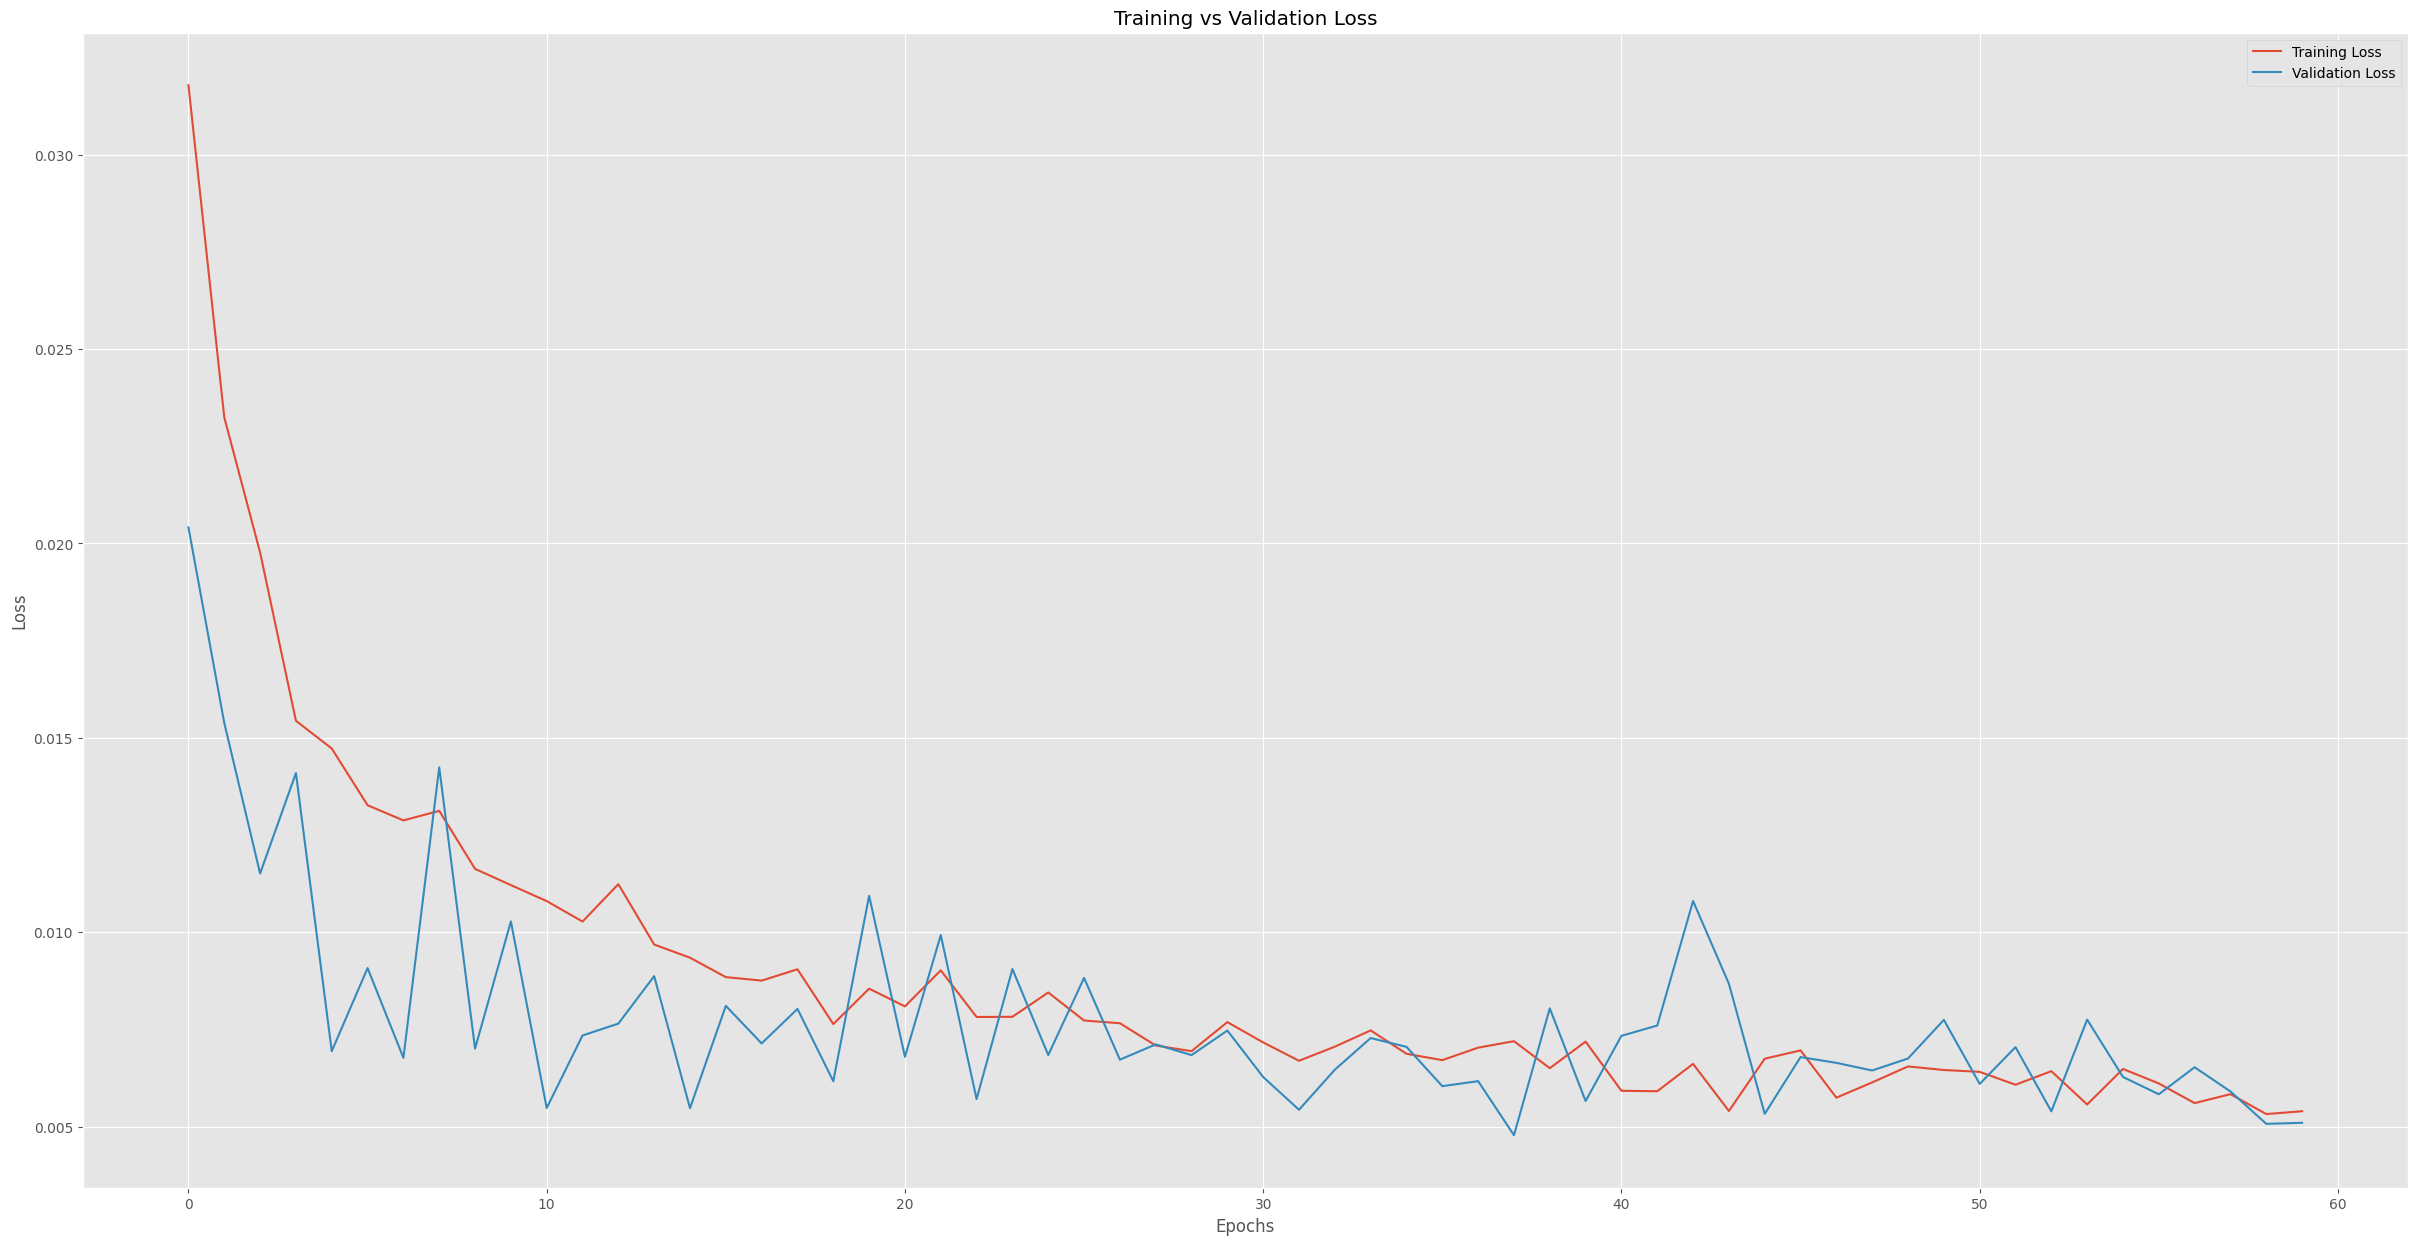

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Compute metrics for training data
train_rmse = np.sqrt(mean_squared_error(actual, train_predictions))
train_mae = mean_absolute_error(actual, train_predictions)
train_r2 = r2_score(actual, train_predictions)

# Compute metrics for validation data
val_rmse = np.sqrt(mean_squared_error(actual_val, val_predictions))
val_mae = mean_absolute_error(actual_val, val_predictions)
val_r2 = r2_score(actual_val, val_predictions)

# Print results
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")


# Assuming 'history' is returned from model.fit()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()



In [104]:

# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,test Predictions,Actuals_test
0,[9863.8505859375],[10032.541666666666]
1,[9817.0537109375],[10732.125]
2,[10045.5322265625],[10733.583333333334]
3,[9877.853515625],[10971.875]
4,[10061.23046875],[11227.791666666666]
...,...,...
331,[10962.9208984375],[12540.25]
332,[11105.4443359375],[12635.958333333334]
333,[11213.4833984375],[11684.333333333334]
334,[10281.451171875],[11384.166666666666]
